# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [20]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

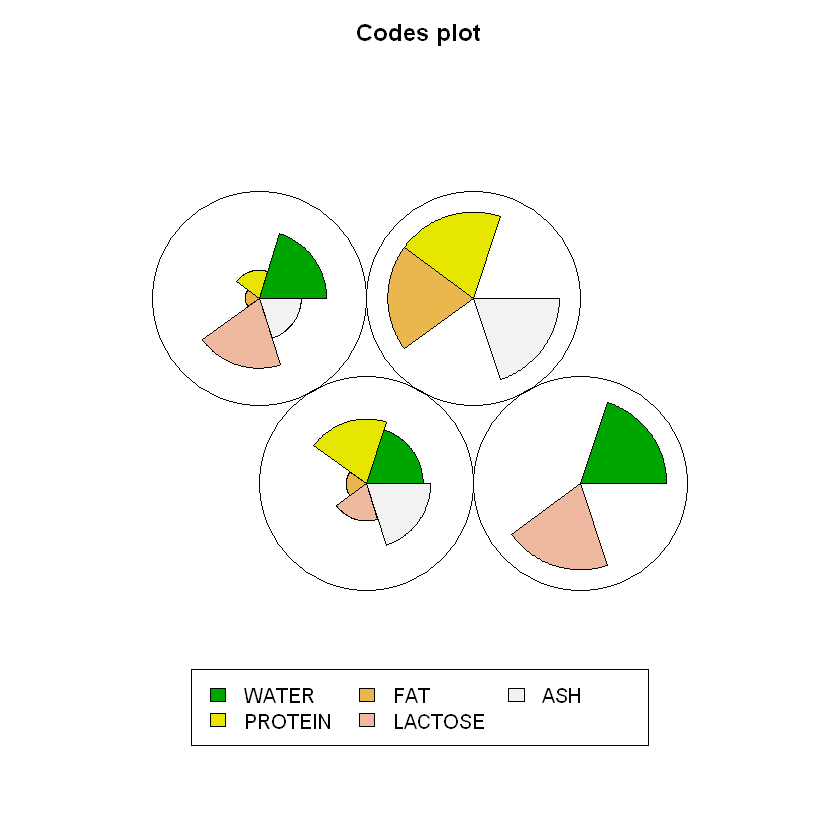

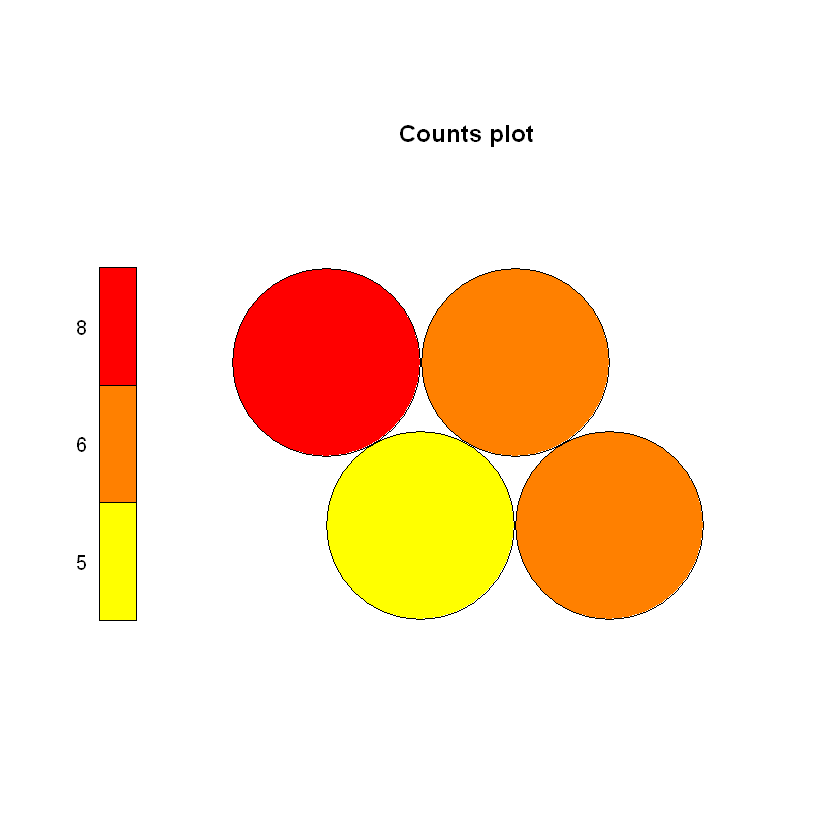

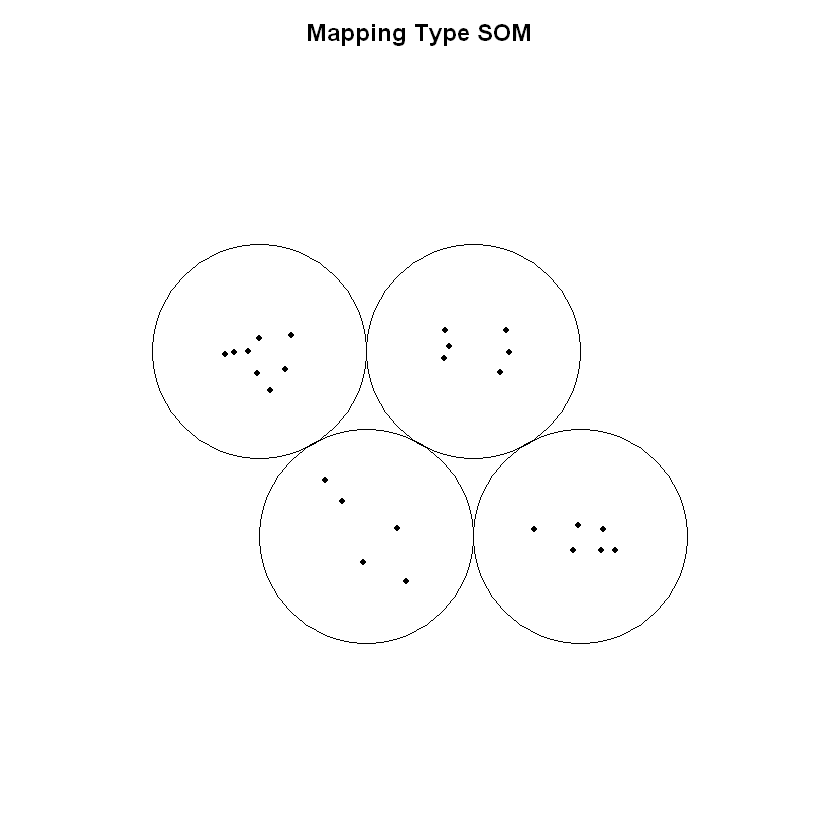

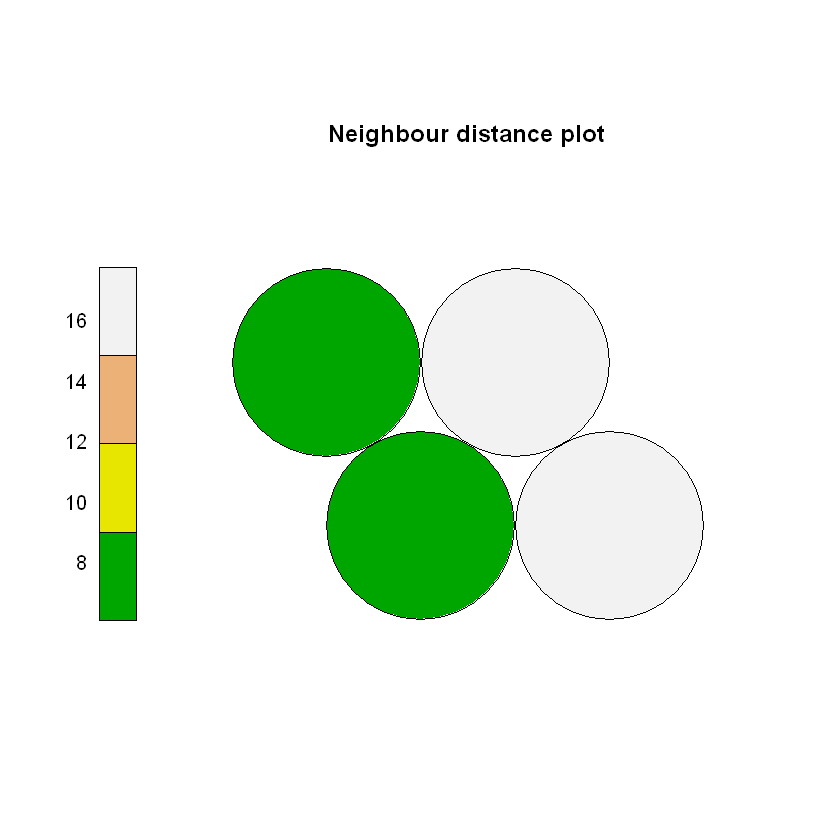

In [25]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

**Respuesta 1**

Los gráficos anteriores representan distintas cosas, cantidad de datos en cada grupo, elementos más importantes de cada grupo o la distancia a sus vecinos.

a)El método funciona como una red neuronal, con tantas neuronas de entrada como parametros tengan los datos, para este caso son 5, agua, grasa, etc. entonces de acuerdo a los parametros de entrada, las neuronas van auto agrupando los datos ingresados, buscando similitudes entre ellos.

b)Dentro de los parametros de entrada se encuentra la cantidad de grupos que se quiere diferenciar y además, las entradas del algoritmo, que son las neuronas, son los atributos de las leches. Con esta información se generane esos gráficos

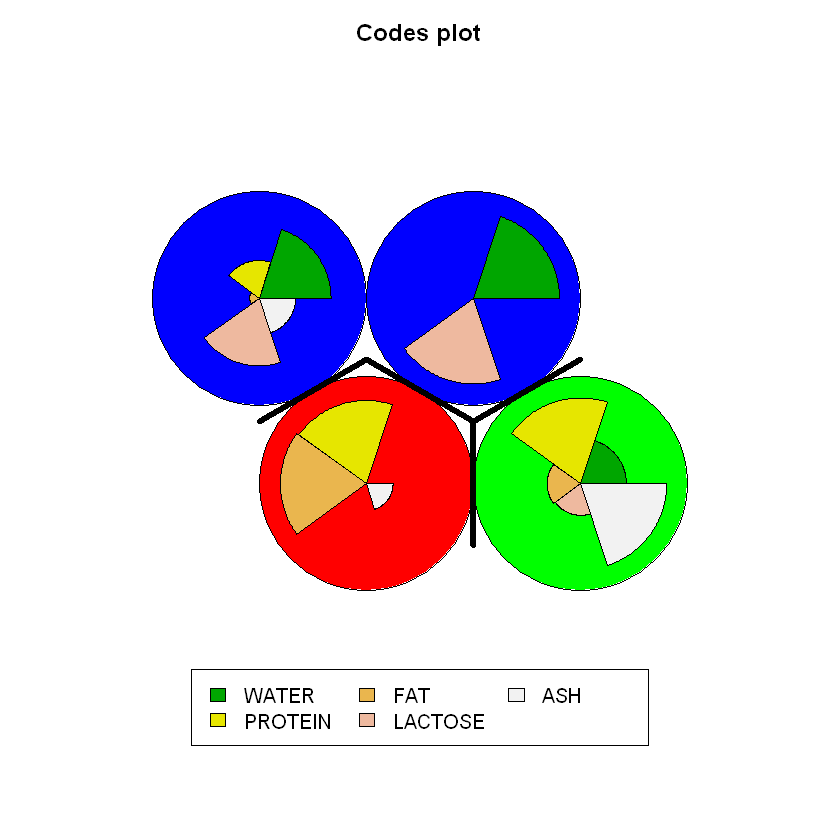

In [19]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.

b) Interprete y comente los resultados obtenidos. 

**Respuesta 2**

a)En la ultima gráfica de datos se puede observar una combinación de los gráficos anteriores, donde se separan 3 grupos, rojo, azul y verde, de los cuales destacan distintos elementos nutricionales, estos son representados por las "porciones de pizza" de distintos tamaños. Y además, en el grupo azul, se hace una subdivisión donde cada uno tiene caracteristicas diferentes.

b)Del grupo rojo, destacan las leches con más grasa y proteina; del verde se destaca la proteina y la ceniza(?), y en menor medida la grasa, lactosa y agua; por ultimo, del grupo azul destacan principalmente el agua y la lactosa.

Ejercicio 3: 

a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones y discuta sus resultados.